# FASHION MNIST

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

4423680/4422102 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


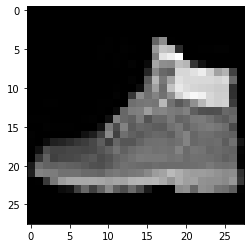

In [3]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[90], cmap=plt.get_cmap('gray'))

Feature Engineering

In [4]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))


In [5]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [6]:
from tensorflow.keras.utils import to_categorical
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
feature_train = feature_train.astype("float32")
feature_test = feature_test.astype("float32")

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

NEURAL NETWORK

In [9]:
base_model = Sequential()

base_model.add(Flatten(input_shape = (28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
base_model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

base_model.summary()
history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5285 - accuracy: 0.8129 - val_loss: 0.4594 - val_accuracy: 0.8344
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8565 - val_loss: 0.4006 - val_accuracy: 0.8568
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3594 - accurac

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)

In [11]:
import pandas as pd

history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.528461,0.812900,0.459419,0.8344,0
1,0.396263,0.856550,0.400643,0.8568,1
2,0.359412,0.869133,0.409379,0.8565,2
3,0.336556,0.877250,0.411224,0.8468,3
4,0.317035,0.884550,0.348657,0.8750,4
5,0.304361,0.888533,0.372840,0.8709,5
6,0.292045,0.892950,0.355779,0.8719,6
7,0.282240,0.896517,0.346825,0.8793,7
8,0.274052,0.899083,0.378573,0.8628,8
9,0.265221,0.902050,0.339440,0.8803,9


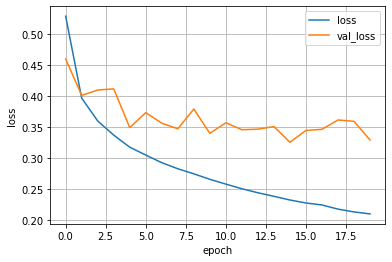

In [12]:
plot_loss(history)

In [13]:
loss, accuracy = base_model.evaluate(feature_test, label_test, verbose=2)

print("Test accuracy: ", accuracy)
print("Loss: ", loss)


313/313 - 1s - loss: 0.3286 - accuracy: 0.8867
Test accuracy:  0.8866999745368958
Loss:  0.328639954328537


Convolutional Neural Network

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

#Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.2933 - accuracy: 0.9010
Test accuracy: 0.9010000228881836
Test loss: 0.2933101952075958


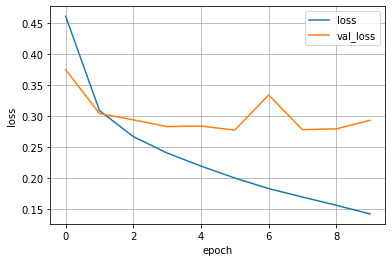

In [16]:
plot_loss(history_cnn)

Akurasi meningkat dari 88% menjadi 90% setelah menggunakan convolutional neural network

# MNIST (untuk soal no.2)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


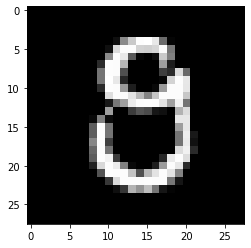

In [17]:
from tensorflow.keras.datasets import mnist
(feature_train1, label_train1), (feature_test1, label_test1) = mnist.load_data()

print("Train", feature_train1.shape, label_train1.shape)
print("Test", feature_test1.shape, label_test1.shape)

plt.imshow(feature_train1[80], cmap=plt.get_cmap('gray'))

In [18]:
feature_train1 = feature_train1.reshape((feature_train1.shape[0], 28, 28, 1))
feature_test1 = feature_test1.reshape((feature_test1.shape[0], 28, 28, 1))

In [19]:
print(feature_train1.shape)

(60000, 28, 28, 1)


In [20]:
from tensorflow.keras.utils import to_categorical

label_train1 = to_categorical(label_train1)
label_test1 = to_categorical(label_test1)

print(label_train1)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [21]:
feature_train1 = feature_train1.astype('float32')
feature_test1 = feature_test1.astype('float32')

feature_train1 = feature_train1 / 255.0
feature_test1 = feature_test1 / 255.0

CNN

In [22]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())

#Fully connected layer
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

history_cnn = model1.fit(feature_train1, label_train1, batch_size=32, validation_data=(feature_test1, label_test1), epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [23]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.2933 - accuracy: 0.9010
Test accuracy: 0.9010000228881836
Test loss: 0.2933101952075958


Semakin dalam arsitektur yang digunakan dalam convolutional neural network semakin tinggi akurasi yang didapatkan. Pada data MNIST yang sebelumnya(di file .ipynb dari pak tommy) hanya digunakan Conv2D 32 filters, kernel 3x3, lalu dilakukan MaxPooling2D. Sedangkan, jika dilakukan lebih dalam lagi, ditambahkan lagi Conv2D 64 filters, lalu MaxPooling2D lagi, akurasinya naik dari 98% menjadi 99%.

Training data diatas(fashion dan mnist) saya hanya menggunakan epoch yang kecil. mungkin dengan menggunakan nilai epoch yang lebih besar (50 atau diatas 100) akan terlihat dimana grafik loss nya yang mulai konstan.